# Writing the Secret Message

Each group will be assigned to draw a specific letter, in a specific plot of paper. If everything goes to plan, the UR3e arm will write out the secret message letter by letter as each group's code runs. Each letter should be contained in a box that is 0.0342 wide and 0.0417 tall and centered at the coordinates assigned to your group. In the below example, the letter is Z and should be placed at coordinates x,y relative to the page.

<div style="display: flex; align-items: center;">
    <img src="img/letter_info.png" alt="Image 1" style="width:300px; margin-right: 10px;"/>
    <img src="img/page_info.png" alt="Image 2" style="width:300px;"/>
</div>

## Coding Your Letters

Use this paper_coordinates() function to translate x,y coordinates on the page to 3D coordinates in the global frame. You will send these coordinates to the move_global() function. Check the plots to see if your letters show up as you want them to. Keep in mind that you have to move the robot arm up and down to indicate when it is drawing or moving above the paper.

Matplotlib created a temporary cache directory at /tmp/matplotlib-37xcr5tj because the default path (/home/jupyter-liam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


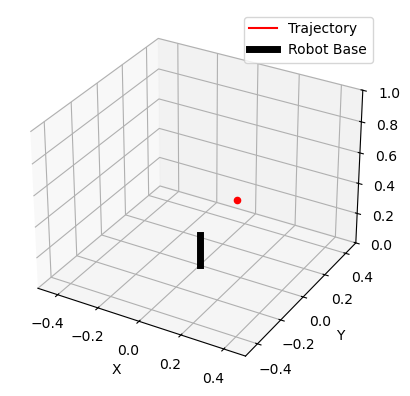

In [1]:
import rclpy
import MyUR3e
import time

rclpy.init()
myrobot = MyUR3e.MyUR3e()

# myrobot.get_logger().set_level(rclpy.logging.LoggingSeverity.DEBUG)

LEFT_TOP = [-0.0904, 0.4208, 0.22, 0, 0, 1]
LEFT_BOTTOM = [-0.0904, 0.2049, 0.217, 0, 0, 1]
RIGHT_BOTTOM = [0.1890, 0.2049, 0.217, 0, 0, 1]
RIGHT_TOP = [0.1890, 0.4208, 0.22, 0, 0, 1]

def paper_coordinates(x,y, up=True):
    cords = []
    if (x > 0.2794) or (y > 0.2159) or (x < 0) or (y < 0):
        raise RuntimeError("Your coordinates are off the paper")
    cords.append(LEFT_BOTTOM[0]+x)
    cords.append(LEFT_BOTTOM[1]+y)
    if up:
        cords.append(0.23)
    else:
        cords.append(0.22-(0.003*((0.2159-y)/0.2159)))
    
    return cords + [0, 0, 0]

# Example: Move the pen to the center of the page
point = paper_coordinates(0.1,0.1, up=True)
myrobot.move_global([point],time_step=2,sim=True)

## Example: Writing the Letter V

The following code will draw the letter V where the bottom of the V is located at (0.1,0.1) on the piece of paper.

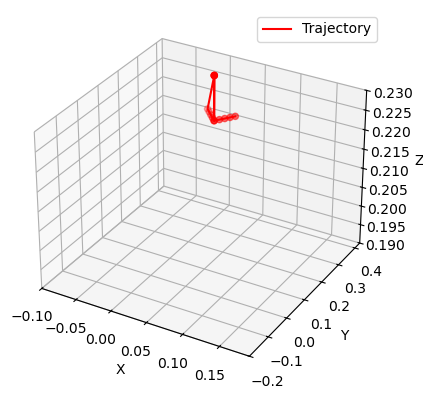

In [2]:
# Create array of sequential points in the desired trajectory
trajectory = []

# Move pen to the start
point = paper_coordinates(0.1,0.1, up=True)
trajectory.append(point)

# Move from bottom to the top in the left segment of the "v"
steps = 5
for t in range(steps):
    x = -0.005 * t + 0.1
    y = 0.01 * t + 0.1
    point = paper_coordinates(x,y, up=False)
    trajectory.append(point)

# Return to the bottom
point = paper_coordinates(0.1,0.1, up=True)
trajectory.append(point)
    
# Move from bottom to the top in the right segment of the "v"
for t in range(steps):
    x = 0.005 * t + 0.1
    y = 0.01 * t + 0.1
    point = paper_coordinates(x,y, up=False)
    trajectory.append(point)

# Execute the trajectory
myrobot.move_global(trajectory,time_step=(2,1),simpaper=True)

## Writing With the Robot

Create new code specific to your letter and position below. When its time to write your letters. Change the sim/simpage parameter from True to False!

In [3]:
# Create array of sequential points in the desired trajectory
trajectory = []

# Move pen to the start
point = paper_coordinates(0.1,0.1, up=True)
trajectory.append(point)